Time Intelligence

In [13]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\91986\OneDrive\Desktop\E-comCustomerSegmentation\data\cleaned_data.csv')

In [6]:

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
if df['Date'].isna().any():
	print(f"Warning: {df['Date'].isna().sum()} rows have invalid Date and were set to NaT")

df['Month'] = df['Date'].dt.to_period('M') 
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=days_order, ordered=True)



In [11]:
df[['Date', 'Month', 'DayOfWeek', 'Hour']].head(10)

,Date,Month,DayOfWeek,Hour
0,2019-12-09,2019-12,Monday,0
1,2019-12-09,2019-12,Monday,0
2,2019-12-09,2019-12,Monday,0
3,2019-12-09,2019-12,Monday,0
4,2019-12-09,2019-12,Monday,0
5,2019-12-09,2019-12,Monday,0
6,2019-12-09,2019-12,Monday,0
7,2019-12-09,2019-12,Monday,0
8,2019-12-09,2019-12,Monday,0
9,2019-12-09,2019-12,Monday,0


Revenue Trends

In [14]:
monthly_sales = df.groupby('Month')['TotalPrice'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

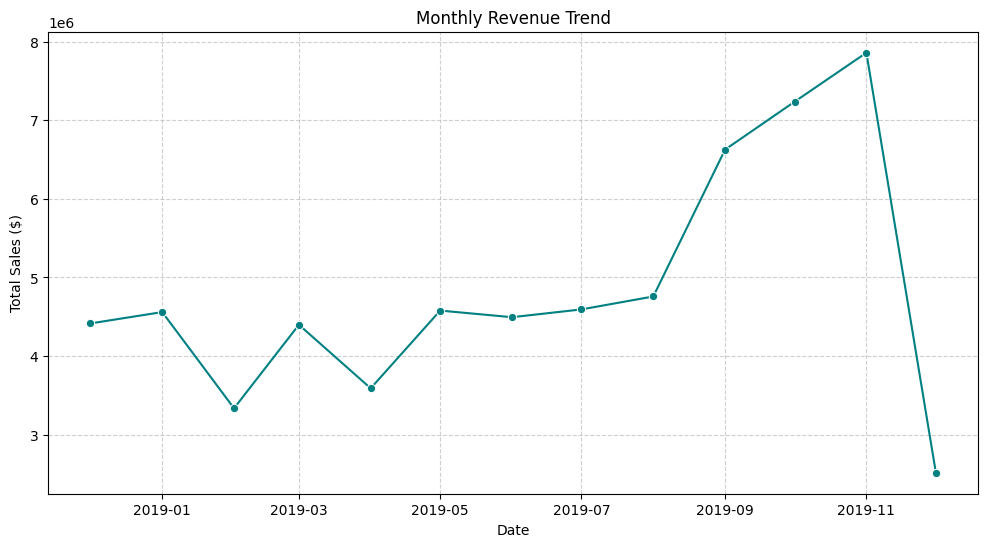

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='TotalPrice', data=monthly_sales, marker='o', color='teal')
plt.title('Monthly Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Operational Heatmap

In [17]:
pivot_table = df.pivot_table(index='DayOfWeek', columns='Hour', values='TransactionNo', aggfunc='nunique')

C:\Users\91986\AppData\Local\Temp\ipykernel_3504\4007810465.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='DayOfWeek', columns='Hour', values='TransactionNo', aggfunc='nunique')


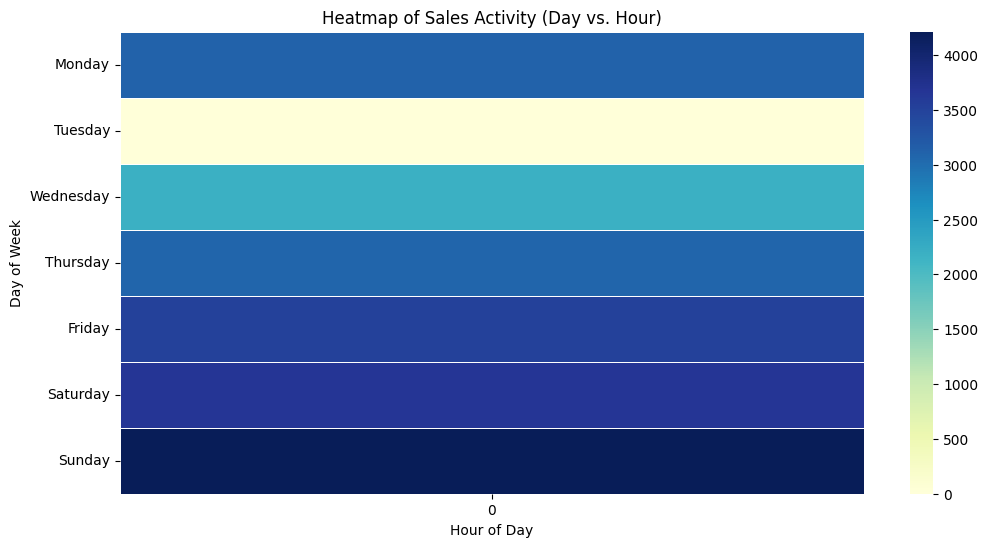

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Sales Activity (Day vs. Hour)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

Geographic Performances

In [23]:
df['Region_Scope'] = np.where(df['Country'] == 'United Kingdom', 'Domestic (UK)', 'International (RoW)')

In [24]:
print(df['Region_Scope'].value_counts())
print("\nRevenue Split:")
print(df.groupby('Region_Scope')['TotalPrice'].sum())

Region_Scope
Domestic (UK)          477770
International (RoW)     49994
Name: count, dtype: int64

Revenue Split:
Region_Scope
Domestic (UK)          52524576.47
International (RoW)    10441315.87
Name: TotalPrice, dtype: float64


In [25]:
country_perf = df.groupby(['Country', 'Region_Scope'])['TotalPrice'].sum().reset_index()

In [26]:
country_perf = country_perf.sort_values('TotalPrice', ascending=False)

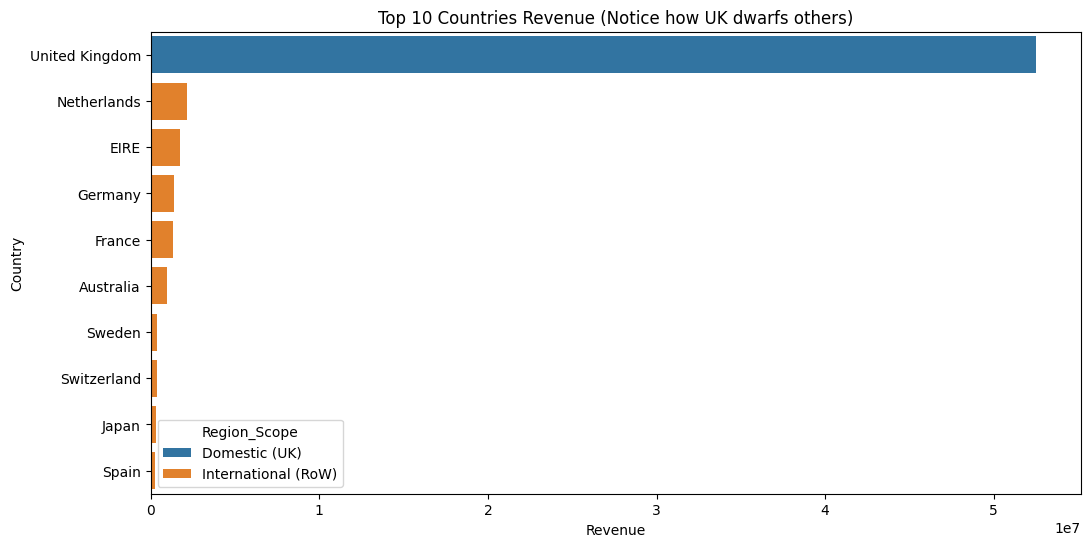

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(data=country_perf.head(10), x='TotalPrice', y='Country', hue='Region_Scope', dodge=False)
plt.title('Top 10 Countries Revenue (Notice how UK dwarfs others)')
plt.xlabel('Revenue')
plt.show()

In [28]:
international_df = country_perf[country_perf['Region_Scope'] == 'International (RoW)']

C:\Users\91986\AppData\Local\Temp\ipykernel_3504\1750429556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=international_df.head(10), x='TotalPrice', y='Country', palette='magma')


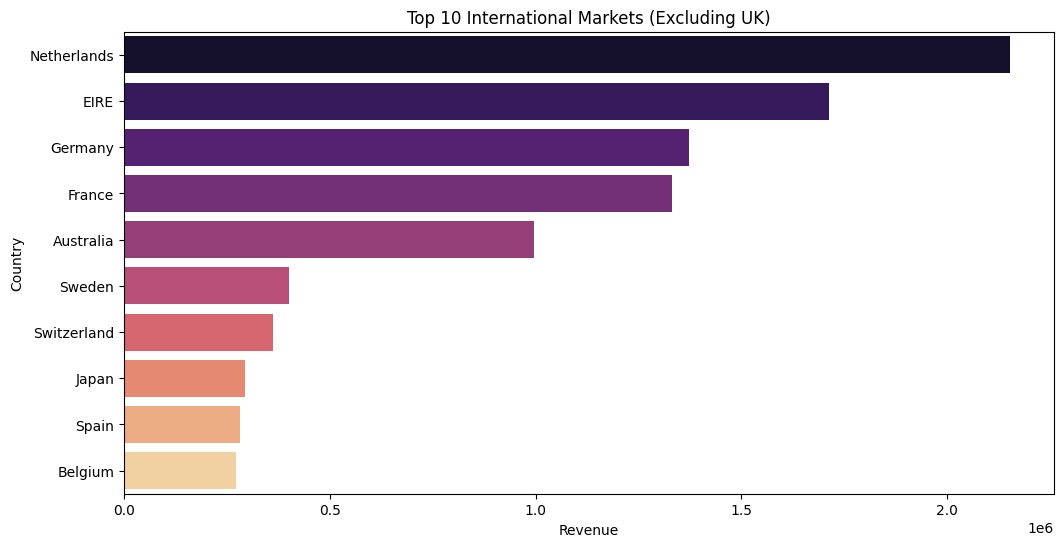

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(data=international_df.head(10), x='TotalPrice', y='Country', palette='magma')
plt.title('Top 10 International Markets (Excluding UK)')
plt.xlabel('Revenue')
plt.show()

In [30]:
country_perf.to_csv('Country_Sales_Data_With_Scope.csv', index=False)
monthly_sales.to_csv('Sales_Trend_Data.csv', index=False)

In [31]:
hourly_sales = df.groupby(['DayOfWeek', 'Hour'])['TransactionNo'].nunique().reset_index()
hourly_sales.rename(columns={'TransactionNo': 'Transaction_Count'}, inplace=True)
hourly_sales.to_csv('Hourly_Activity_Data.csv', index=False)

C:\Users\91986\AppData\Local\Temp\ipykernel_3504\1059551390.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_sales = df.groupby(['DayOfWeek', 'Hour'])['TransactionNo'].nunique().reset_index()
